## **Detecting whether or not a bank goes bankrupt  after 1 year**

 **Importing necessary libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

 **Importing bankruptcy dataset**

In [2]:
from scipy.io import arff
from io import BytesIO
data = arff.loadarff('5year.arff')
df = pd.DataFrame(data[0])
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values
y=[]
for i in range(len(Y)):
  if(Y[i]==b'0'):
    y.append(0)
  else:
    y.append(1)

 **Processing missing values**

In [3]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

**Splitting dataset into training and test sets**

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# **Logistic regression**

**Training the logistic regression model**


In [5]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

**Predicting the target labels of testset** 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


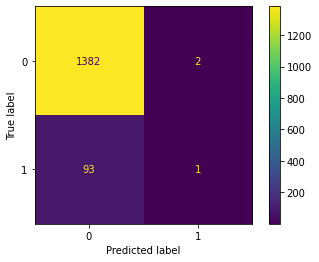

accuracy = 0.935724
precision = 0.333333
recall score = 0.010638
f1 score = 0.020619


In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(classifier, X_test, Y_test)  
plt.show()
print("accuracy = %f" % accuracy_score(Y_test, Y_pred))
print("precision = %f" % precision_score(Y_test, Y_pred))
print("recall score = %f" % recall_score(Y_test, Y_pred))
print("f1 score = %f" % f1_score(Y_test, Y_pred))
#https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/

**Eliminating attributes based on correlation**


In [7]:
print(len(X[0]))
l=[]
for i in range(0,len(X[0])):
  xmat=X[:,i]
  ymat=np.array(y)
  r = np.corrcoef(xmat, ymat)
  if(r[0,1]>0):
    l.append(i)
X=np.delete(X, l, axis=1)
print(len(X[0]))

64
42


**Training the logistic regression model after reducing X**

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


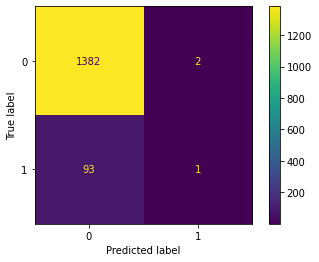

accuracy = 0.935724
precision = 0.333333
recall score = 0.010638
f1 score = 0.020619


In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(classifier, X_test, Y_test)  
plt.show()
print("accuracy = %f" % accuracy_score(Y_test, Y_pred))
print("precision = %f" % precision_score(Y_test, Y_pred))
print("recall score = %f" % recall_score(Y_test, Y_pred))
print("f1 score = %f" % f1_score(Y_test, Y_pred))

# **Feacture extraction**

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
print(len(X_train[0]))
X_train = lda.fit_transform(X_train, Y_train)
X_test = lda.transform(X_test)
print(len(X_train[0]))

64
1


**Training the logistic regression model after feature extraction**

In [11]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

Predicting the target lables of testset

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


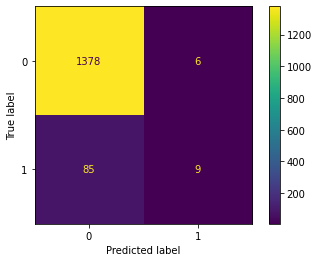

accuracy = 0.938430
precision = 0.600000
recall score = 0.095745
f1 score = 0.165138


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(classifier, X_test, Y_test)  
plt.show()
print("accuracy = %f" % accuracy_score(Y_test, Y_pred))
print("precision = %f" % precision_score(Y_test, Y_pred))
print("recall score = %f" % recall_score(Y_test, Y_pred))
print("f1 score = %f" % f1_score(Y_test, Y_pred))

# **Linear Support Vector Machine**

In [13]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


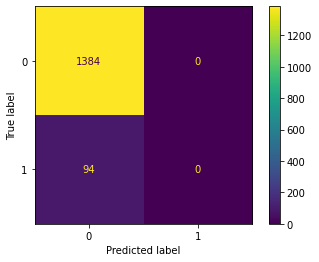

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy = 0.936401
precision = 0.000000
recall score = 0.000000
f1 score = 0.000000


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(classifier, X_test, Y_test)  
plt.show()
print("accuracy = %f" % accuracy_score(Y_test, Y_pred))
print("precision = %f" % precision_score(Y_test, Y_pred))
print("recall score = %f" % recall_score(Y_test, Y_pred))
print("f1 score = %f" % f1_score(Y_test, Y_pred))

# **Polynomial Support Vector Machine**

In [15]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly',degree=3, random_state = 0)
classifier.fit(X_train, Y_train)

SVC(kernel='poly', random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


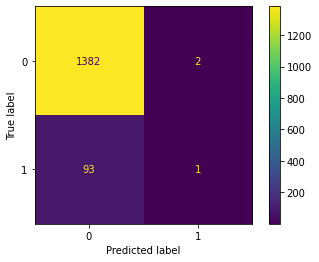

accuracy = 0.935724
precision = 0.333333
recall score = 0.010638
f1 score = 0.020619


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(classifier, X_test, Y_test)  
plt.show()
print("accuracy = %f" % accuracy_score(Y_test, Y_pred))
print("precision = %f" % precision_score(Y_test, Y_pred))
print("recall score = %f" % recall_score(Y_test, Y_pred))
print("f1 score = %f" % f1_score(Y_test, Y_pred))

# **Radial basis function SVM**

In [17]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


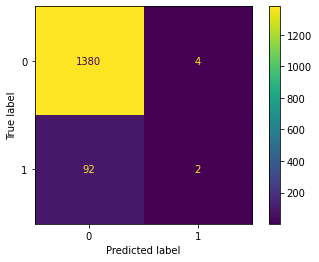

accuracy = 0.935047
precision = 0.333333
recall score = 0.021277
f1 score = 0.040000


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(classifier, X_test, Y_test)  
plt.show()
print("accuracy = %f" % accuracy_score(Y_test, Y_pred))
print("precision = %f" % precision_score(Y_test, Y_pred))
print("recall score = %f" % recall_score(Y_test, Y_pred))
print("f1 score = %f" % f1_score(Y_test, Y_pred))

# **K-NN model**

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


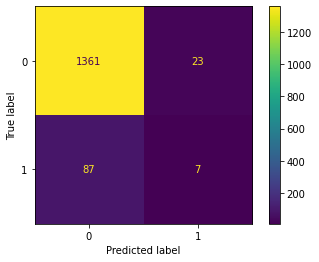

accuracy = 0.925575
precision = 0.233333
recall score = 0.074468
f1 score = 0.112903


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(classifier, X_test, Y_test)  
plt.show()
print("accuracy = %f" % accuracy_score(Y_test, Y_pred))
print("precision = %f" % precision_score(Y_test, Y_pred))
print("recall score = %f" % recall_score(Y_test, Y_pred))
print("f1 score = %f" % f1_score(Y_test, Y_pred))